### Titanic dataset

In [2]:
import pandas as pd
import numpy as np

In [7]:
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')

In [191]:
train_data.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked Cab_cat  
PassengerId                                                                  
1                1      0         A/5 21171   7.2500   NaN        S     NaN  
2                1      0          PC 17599  71.2833   C85        C       C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S     NaN  
4                1      0            113803  53.1000  C123        S       C  
5                0      0            373450   8.0500   NaN        S     NaN

The attributes have the following meaning:

* <b>PassengerId</b>: a unique identifier for each passenger<br>
* <b>Survived</b>: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.<br>
* <b>Pclass</b>: passenger class.<br>
* <b>Name, Sex, Age</b>: self-explanatory<br>
* <b>SibSp</b>: how many siblings & spouses of the passenger aboard the Titanic.<br>
* <b>Parch</b>: how many children & parents of the passenger aboard the Titanic.<br>
* <b>Ticket</b>: ticket id<br>
* <b>Fare</b>: price paid (in pounds)<br>
* <b>Cabin</b>: passenger's cabin number<br>
* <b>Embarked</b>: where the passenger embarked the Titanic<br>

In [9]:
# Let's explicitly set the PassengerId column as the index column:
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [246]:
train_data.isna().mean()

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
Cab_cat     0.771044
dtype: float64

In [11]:
train_data.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [12]:
train_data["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [13]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [192]:
train_data['Cab_cat'] = train_data["Cabin"].str[0]
test_data['Cab_cat'] = test_data["Cabin"].str[0]

In [244]:
train_data[["Survived","Cab_cat"]].dropna().groupby('Cab_cat').mean().reset_index()

Cab_cat  Survived
0       A  0.466667
1       B  0.744681
2       C  0.593220
3       D  0.757576
4       E  0.750000
5       F  0.615385
6       G  0.500000
7       T  0.000000

The Embarked attribute tells us where the passenger embarked: C=Cherbourg, Q=Queenstown, S=Southampton.

In [193]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [194]:
num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

In [195]:
from sklearn.preprocessing import OneHotEncoder

In [196]:
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [197]:
from sklearn.compose import ColumnTransformer

In [198]:
num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked", "Cab_cat"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [199]:
X_train = preprocess_pipeline.fit_transform(
    train_data[num_attribs + cat_attribs])
X_train

array([[-0.56573646,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.66386103,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.20276197, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  0.        ]])

In [200]:
y_train = train_data["Survived"]

In [201]:
X_test = preprocess_pipeline.transform(test_data[num_attribs + cat_attribs])

In [160]:
# param_grid = [
#     {
#     'max_depth': [10], 
#     'n_estimators': [1000], 
#     'min_samples_split':[20], 'min_samples_leaf':[1]
#     }
#   ]

# forest_clf = RandomForestClassifier()

# grid_search = GridSearchCV(forest_clf, param_grid, cv=10,
#                            scoring='accuracy',
#                            return_train_score=True,
#                            verbose=2)
# grid_search.fit(X_train, y_train)


# grid_scores = cross_val_score(grid_search, X_train, y_train, cv=10)
# grid_scores.mean()

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=20, n_estimators=1000; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=20, n_estimators=1000; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=20, n_estimators=1000; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=20, n_estimators=1000; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=20, n_estimators=1000; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=20, n_estimators=1000; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=20, n_estimators=1000; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=20, n_estimators=1000; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=20, n_estimators=1000; total time=   1.2s
[CV] END max

0.826067415730337

{'max_depth': 10, 'n_estimators': 1000, 'random_state': 42}  <b> 0.8249563046192261 </b></br>
{'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 1000, 'random_state': 42}  <b> 0.8249937578027465 </b></br>
{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 20,
 'n_estimators': 1000,
 'random_state': 42}  <b> 0.8305742821473159 </b></br>

In [162]:
# grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 20,
 'n_estimators': 1000}

In [225]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm

In [239]:
params = {'max_depth': 10,
          'min_samples_leaf': 1,
          'min_samples_split': 20,
          'n_estimators': 1000}

models = {"LogisticRegression":LogisticRegression(),
          "Random Forest":RandomForestClassifier(n_estimators=1000),
          "Random Forest (tuned)":RandomForestClassifier(**params),
          "SVM":SVC(),
          "CatBoost":CatBoostClassifier(verbose=1000),
          "XGBoost":XGBClassifier(),
          "LightGBM":LGBMClassifier()}

scores = dict()

for name, model_ in tqdm(models.items()):
    model_.fit(X_train, y_train)
    score_ = cross_val_score(model_, X_train, y_train, cv=10)
    scores[name] = score_

 57%|█████▋    | 4/7 [00:30<00:21,  7.09s/it]

Learning rate set to 0.009807
0:	learn: 0.6860203	total: 2.26ms	remaining: 2.25s
999:	learn: 0.2779731	total: 3.36s	remaining: 0us
Learning rate set to 0.009371
0:	learn: 0.6864895	total: 10.6ms	remaining: 10.5s
999:	learn: 0.2688177	total: 4s	remaining: 0us
Learning rate set to 0.009376
0:	learn: 0.6864131	total: 34.5ms	remaining: 34.5s
999:	learn: 0.2725071	total: 3.25s	remaining: 0us
Learning rate set to 0.009376
0:	learn: 0.6857606	total: 13.3ms	remaining: 13.3s
999:	learn: 0.2469531	total: 3.83s	remaining: 0us
Learning rate set to 0.009376
0:	learn: 0.6871168	total: 1.64ms	remaining: 1.64s
999:	learn: 0.2767117	total: 2.96s	remaining: 0us
Learning rate set to 0.009376
0:	learn: 0.6864764	total: 8.99ms	remaining: 8.98s
999:	learn: 0.2850843	total: 2.77s	remaining: 0us
Learning rate set to 0.009376
0:	learn: 0.6866711	total: 21.2ms	remaining: 21.2s
999:	learn: 0.2782370	total: 2.42s	remaining: 0us
Learning rate set to 0.009376
0:	learn: 0.6866412	total: 2.35ms	remaining: 2.35s
999:	

100%|██████████| 7/7 [01:10<00:00, 10.14s/it]


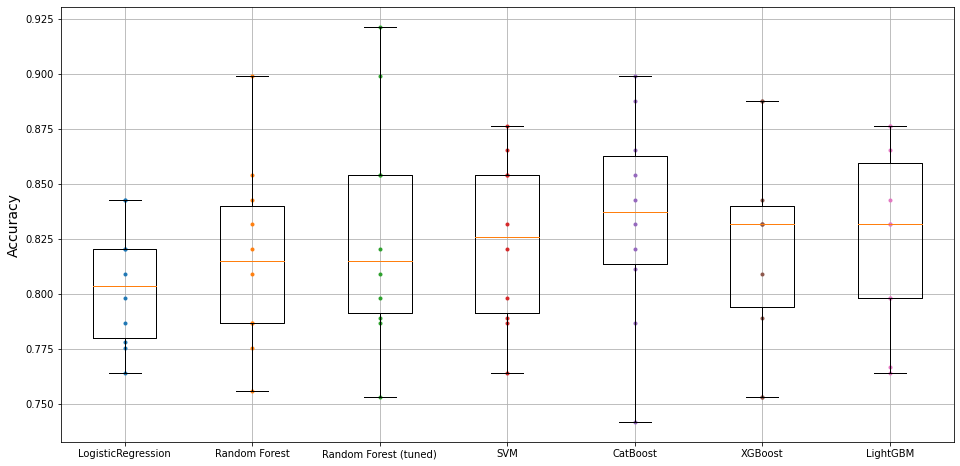

In [240]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
for n, val in enumerate(scores.values()):
        plt.plot([n+1]*10, val, ".")
        
plt.boxplot(scores.values(), 
            labels=scores.keys())
plt.ylabel("Accuracy", fontsize=14)
plt.grid(True)
plt.show()

In [243]:
for name, model_ in models.items():
    y_pred = model_.predict(X_test)
    result = pd.DataFrame({'PassengerId':test_data.index, 'Survived':y_pred})
    result.to_csv('result_{}.csv'.format(name.replace(' ', '_')), index=False)

100%|██████████| 7/7 [00:00<00:00, 24.12it/s]


Kaggle results:</br>
LightGBM <b>0.76555</b> old</br> 
CatBoost <b>0.77511</b></br> 
XGBoost <b>0.76315</b> old</br> 
RandomForest (with tune) <b>0.78947</b></br>
RandomForest <b>0.76076</b> old</br> 
SVM <b>0.77990</b>